# ДАП экзамен 

Время выполнения заданий — 2 часа (11:10 — 13:10). Жёсткий дедлайн загрузки файлов - 13:20. Экзамен включает в себя 3 обязательных задания и одно бонусное подзадание. Ответ на кодовую фразу не оценивается.   

Уточнения условия, если они будут, появятся в нашем канале. __Мы живем в сумрачном мире.__

__Ответ на кодовую фразу:__ И на закате нет друзей.

## Exercise 1 [20 баллов] ("eeeeeee")

На вход поступает непустая строка. Вам нужно посчитать максимальную длину последователости состоящей только из буквы "e" (русская буква).

__Примеры:__

```
eee_func("е ее еее") -> 3
eee_func("е ее еее") -> 3
eee_func("экзамен ееееее") -> 6
eee_func("праздники ееееееeeee") -> 10
eee_func("экзамен ееееее, а потом праздники ееееееeeee") -> 10
```


In [1]:
import numpy as np

In [2]:
def eee_func(text):
    
    list_e = list(map(str, text.split()))
    list_e = [a for a in list_e if set(str(a)) == set("е")]
    max_ee = len(sorted(list_e)[-1])
    
    return max_ee

Если вы написали функцию правильно, она пройдёт тесты ниже без ошибок. Если ваша функция прошла все тесты, это не означает, что она написана правильно. 

In [3]:
assert eee_func("е") == 1, "Test 1 Failed"
assert eee_func("е ее еее") == 3, "Test 2 Failed"
assert eee_func("экзамен ееееее") == 6, "Test 3 Failed"
assert eee_func("праздники ееееееееее") == 10, "Test 4 Failed"
assert eee_func("экзамен ееееее, а потом праздники ееееееееее") == 10, "Test 5 Failed"

print("OK. Good Job! Eeeee!")

OK. Good Job! Eeeee!


## Extrasize 2 [40 баллов] (учим других)

Перед вами данные с оценками различных приложений. Ваша задача - построить модель, которая сможет прогнозировать будет ли приложение обладать высоким рейтингом.

__Примечание:__ если данные не парсятся с гита, просто перейдите по ссылке и скачайте табличку на свой компьютер.

In [4]:
import pandas as pd 

url = "https://raw.githubusercontent.com/FUlyankin/ML_for_marketing/master/drafts/drafts/AppleStore.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


__а)__ оставьте в данных колонки `["price", "user_rating", "prime_genre", "lang.num", "size_bytes"]`

In [5]:
# Примерно 1 строчка кода 
df = df[["price", "user_rating", "prime_genre", "lang.num", "size_bytes"]].reset_index(drop=True)

__б)__ на базе колонки `user_rating` создайте колонку `is_popular`, запишите туда $1$, если рейтинг приложения больше 4. Иначе запишите 0. Колонку `user_rating` удалите. 

In [6]:
# Примерно 2 строчки кода
df["is_popular"] = (df["user_rating"]>4).astype(int)
df.drop(columns = 'user_rating', inplace = True)

__в)__ Сделайте OHE-преобразование. Категориальной будет только колонка `prime_genre`.

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
enc = OneHotEncoder()
df = pd.concat([df, pd.DataFrame(enc.fit_transform(np.array(df['prime_genre']).reshape(-1,1)).toarray(),\
                                 columns = enc.categories_[0])], axis = 1).drop(columns = 'prime_genre')

__г)__ Выделите колонку `is_popular` в вектор $y$, а остальные колонки в матрицу $X$. Подгрузите метод `train_test_split`. Разбейте выборку на тренировочную и тестовую. 

In [9]:
# Примерно 4 строчки кода
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'is_popular')
y = df.is_popular
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

__д)__ Обучите на тренировочной выборке две модели: случайный лес с $200$ деревьями и логистическую регрессию. 

In [10]:
# Примерно 6 строчек кода
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

forest = RandomForestClassifier(n_estimators= 200)
logreg = LogisticRegression()

forest.fit(X_train, y_train)
logreg.fit(X_train, y_train)

LogisticRegression()

__е)__ Постройте прогнозы для тестовой выборке. Нарисуйте для обоих алгоритмов ROC-кривые на одной картинке. Найдите площадь под ROC-кривой. Какой алгоритм показал более высокое качество? 

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

Text(0.5, 1.0, 'ROC curve')

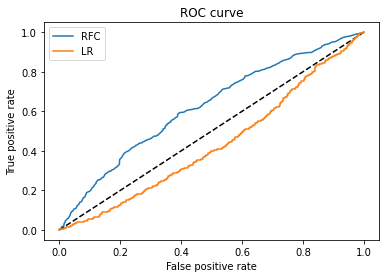

In [12]:
# Примерно 7 строчек кода
y_pred_forest = forest.predict_proba(X_test)[:, 1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_forest)

y_pred_logreg = logreg.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_logreg)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rfc, tpr_rfc, label='RFC')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.legend()

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

__ё)__ Попробуйте подобрать для логистической регрессии сулу регуляризации `C` по решётке. Какое значение параметра оказалось самым лучшим? Найдите для самого хорошего алгоритма площадь под ROC-кривой на тестовой выборке. Удалось ли побить случайный лес?  

In [13]:
# Примерно 7 строчек кода
from sklearn.model_selection import GridSearchCV
params = {'C': np.arange(0.01, 10, 0.1)}
grd_clf_logreg = GridSearchCV(logreg, params)
grd_clf_logreg.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01, 2.11,
       2.21, 2.31, 2.41, 2.51, 2.61, 2.71, 2.81, 2.91, 3.01, 3.11, 3.21,
       3.31, 3.41, 3.51, 3.61, 3.71, 3.81, 3.91, 4.01, 4.11, 4.21, 4.31,
       4.41, 4.51, 4.61, 4.71, 4.81, 4.91, 5.01, 5.11, 5.21, 5.31, 5.41,
       5.51, 5.61, 5.71, 5.81, 5.91, 6.01, 6.11, 6.21, 6.31, 6.41, 6.51,
       6.61, 6.71, 6.81, 6.91, 7.01, 7.11, 7.21, 7.31, 7.41, 7.51, 7.61,
       7.71, 7.81, 7.91, 8.01, 8.11, 8.21, 8.31, 8.41, 8.51, 8.61, 8.71,
       8.81, 8.91, 9.01, 9.11, 9.21, 9.31, 9.41, 9.51, 9.61, 9.71, 9.81,
       9.91])})

In [14]:
grd_clf_logreg.best_estimator_.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [15]:
from sklearn.metrics import roc_auc_score

In [16]:
#Forest
roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])

0.6222455929487178

In [17]:
#Logreg
roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

0.43148056498240317

Точности не прибавилось, от слова совсем. Данные не такие хорошие и поэтому регуляризация l2 не помогает

__з)__ Своими словами опишите зачем обычно выборку разбивают на тренировочную и тестовую. Объясните что такое кросс-валидация и зачем её придумали. 

In [18]:
# Примерно абзац текста

Для предотвращения переобучения, чтобы в случае чего глянуть не запомнила ли наша модель данные и показывает нам хорошую точность, но не обобщает прогнозы(можно посмотреть на норму весов, которая собственно и есть в l2 регуляризации, но у нас данные плохие, поэтому смотреть бесполезно). Кросс-валидация это метод решения задач с использованием разбиения выборки на несколько частей(обычно 5), делается это для того, чтобы проверить насколько модель обобщается. Как работает: мы разбиваем выборку на n частей, тренируем на n-1 и на оставшейся части проверяем, напротяжении проверки тестовыми должны оказаться все части по порядку.

"А где буква ж?" - спросите вы. Если бы мы выбросили букву ё, никто бы не спросил. А ей, между прочим, тоже обидно!

## Expecto Patronum 3 [40 баллов] (соскучились по мне?)

На страничке https://www.hse.ru/org/persons/ находится информация про сотрудников Вышки. Ваша задача спарсить её. Выберите свою любимую букву алфавита (конечно же такую, что на неё есть сотрудники на сайте). Напишите код, который соберёт все фамилии и имена преподавателей, а потом сохранит эту информацию в табличку формата `.csv`.

In [19]:
# Ваш код
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup

resp = urlopen('https://www.hse.ru/org/persons/')
html = resp.read().decode('utf8')
soup = BeautifulSoup(html, 'html.parser')

In [20]:
fio = list()
for tr in soup.find_all('a'):
    for td in tr.find_all('div'):
        fio.append(list(td['alt'].split())[:3])

In [21]:
fio = list()
for tr in soup.find_all('a'):
    for td in tr.find_all('div'):
        fio.append(list(td['alt'].split())[:2])
dataframe = pd.DataFrame(fio, columns = ['surname', 'name'])
dataframe.head()

,surname,name
0,Абалмасова,Екатерина
1,Абанкина,Ирина
2,Абанкина,Татьяна
3,Абанокова,Ксения
4,Абашева,Анна


In [22]:
dataframe.to_csv('Surname_Name.csv', index = False)

### [бонусные 20 баллов] 

Собери всех сотрудников вышке с ФИО, телефонами, должностями и информацией с личных страниц (оброзавание, достижения и тп).

In [23]:
# :) 